In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vec_normal.csv
/kaggle/input/vec_anomalous.csv
/kaggle/input/vec_all.csv


In [16]:
#all_requests = normal_requests + anomalous_requests
df_normal = pd.read_csv("/kaggle/input/vec_normal.csv", header = None)
df_anomalous = pd.read_csv("/kaggle/input/vec_anomalous.csv", header = None)
print(df_normal.head(10))
print(df_anomalous.head(10))

      0    1     2    3     4    5     6    7         8         9         10
0  118.0  1.0  65.0  5.0  16.0  5.0  24.0  3.0  0.156250  0.750000  0.093750
1  120.0  3.0  65.0  5.0  16.0  5.0  24.0  3.0  0.156250  0.750000  0.093750
2  117.0  1.0  60.0  5.0   9.0  0.0  29.0  0.0  0.000000  1.000000  0.000000
3  119.0  3.0  60.0  5.0   9.0  0.0  29.0  0.0  0.000000  1.000000  0.000000
4   66.0  1.0   4.0  1.0   1.0  1.0   0.0  0.0  1.000000  0.000000  0.000000
5   68.0  3.0   4.0  1.0   1.0  1.0   0.0  0.0  1.000000  0.000000  0.000000
6   86.0  1.0  33.0  1.0  24.0  0.0  23.0  1.0  0.000000  0.958333  0.041667
7   88.0  3.0  33.0  1.0  24.0  0.0  23.0  1.0  0.000000  0.958333  0.041667
8   95.0  1.0  43.0  3.0  14.0  4.0  20.0  2.0  0.153846  0.769231  0.076923
9   97.0  3.0  43.0  3.0  14.0  4.0  20.0  2.0  0.153846  0.769231  0.076923
      0    1      2    3     4    5     6     7         8         9         10
0  180.0  1.0  127.0  5.0  64.0  3.0  71.0  20.0  0.031915  0.755319  0.21

In [17]:
# add header
df_normal.columns = ["length", "method", "len of params", "num of params", "max len of params", "num of digit", "num of letters", "num of special char", "digit rate", "letter rate", "spe char rate"]
df_anomalous.columns = ["length", "method", "len of params", "num of params", "max len of params", "num of digit", "num of letters", "num of special char", "digit rate", "letter rate", "spe char rate"]

# define labels for validation
df_normal["label"]= 0
df_anomalous["label"] = 1
print(df_normal.shape)
print(df_anomalous.shape)

# concat
frames = [df_normal, df_anomalous]
df_all = pd.concat(frames)
print(df_all.shape)

(16000, 12)
(19572, 12)
(35572, 12)


In [21]:
# split features and labels
X = df_all.drop("label", axis=1)
y = df_all.label


# Data Normalization using min-max
X = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))

In [22]:
X

,length,method,len of params,num of params,max len of params,num of digit,num of letters,num of special char,digit rate,letter rate,spe char rate
0,0.099836,0.0,0.100494,0.307692,0.047468,0.023041,0.110599,0.024390,0.156250,0.750000,0.093750
1,0.103110,1.0,0.100494,0.307692,0.047468,0.023041,0.110599,0.024390,0.156250,0.750000,0.093750
2,0.098200,0.0,0.092257,0.307692,0.025316,0.000000,0.133641,0.000000,0.000000,1.000000,0.000000
3,0.101473,1.0,0.092257,0.307692,0.025316,0.000000,0.133641,0.000000,0.000000,1.000000,0.000000
4,0.014730,0.0,0.000000,0.000000,0.000000,0.004608,0.000000,0.000000,1.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
19567,0.481178,1.0,0.479407,0.923077,0.180380,0.258065,0.576037,0.146341,0.281407,0.628141,0.090452
19568,0.389525,0.0,0.390445,0.923077,0.075949,0.147465,0.460829,0.105691,0.220690,0.689655,0.089655
19569,0.392799,1.0,0.390445,0.923077,0.075949,0.147465,0.460829,0.105691,0.220690,0.689655,0.089655
19570,0.391162,0.0,0.392092,0.923077,0.075949,0.147465,0.470046,0.089431,0.220690,0.703448,0.075862


In [28]:
# K-means n_clusters = 2
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2,random_state=0).fit(X)
y_pred_km = km.predict(X)
y_pred_km

array([1, 0, 1, ..., 0, 1, 0], dtype=int32)

0.5453770529067454
0.490343347639485
0.5163980736635368
[[8000 8000]
 [9975 9597]]


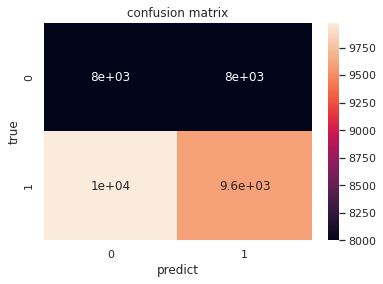

In [30]:
# validation
from sklearn.metrics import precision_score, recall_score, f1_score

print(precision_score(y, y_pred_km))
print(recall_score(y, y_pred_km))
print(f1_score(y, y_pred_km))

# Confusion Matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def draw_cm(y_test, y_predict):
    sns.set()
    f,ax=plt.subplots()
    C1= confusion_matrix(y_test, y_predict, labels = [0, 1])
    print(C1)
    sns.heatmap(C1,annot=True,ax=ax) # hot plot display

    ax.set_title('confusion matrix') 
    ax.set_xlabel('predict')
    ax.set_ylabel('true')
    
draw_cm(y, y_pred_km)

In [33]:
# elbow method
import warnings
warnings.filterwarnings('ignore')

def distEclud(vecA, vecB):
    return np.sum(np.power(vecA - vecB, 2))
 
def test_Kmeans_nclusters(data_train):
    data_train = data_train.values
    nums=range(2,16)
    SSE = []
    for num in nums:
        sse = 0
        kmodel = KMeans(n_clusters=num, n_jobs=4)
        kmodel.fit(data_train)
        # 簇中心
        cluster_ceter_list = kmodel.cluster_centers_
        # 个样本属于的簇序号列表
        cluster_list = kmodel.labels_.tolist()
        for index in  range(len(data_train)):
            cluster_num = cluster_list[index]
            sse += distEclud(data_train[index, :], cluster_ceter_list[cluster_num])
        print("when k equals: ",num , "SSE = ", sse)
        SSE.append(sse)
    return nums, SSE
 
nums, SSE = test_Kmeans_nclusters(X)

when k equals:  2 SSE =  13744.405309852571
when k equals:  3 SSE =  8960.407832290795
when k equals:  4 SSE =  5711.366270261053
when k equals:  5 SSE =  3290.165603396856
when k equals:  6 SSE =  2498.1697838013024
when k equals:  7 SSE =  2098.0526131026545
when k equals:  8 SSE =  1822.921793644875
when k equals:  9 SSE =  1564.4864656671762
when k equals:  10 SSE =  1282.128754276852
when k equals:  11 SSE =  1054.9597754524261
when k equals:  12 SSE =  958.7266333980674
when k equals:  13 SSE =  876.4351169562556
when k equals:  14 SSE =  806.1814685484527
when k equals:  15 SSE =  745.4779957362545


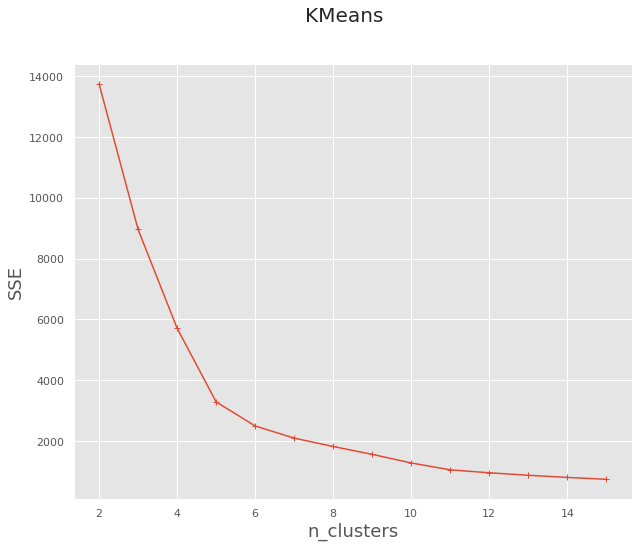

In [35]:
plt.rcParams['font.size'] = 12.0
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('ggplot')
# draw plot
fig=plt.figure(figsize=(10, 8))
ax=fig.add_subplot(1,1,1)
ax.plot(nums,SSE,marker="+")
ax.set_xlabel("n_clusters", fontsize=18)
ax.set_ylabel("SSE", fontsize=18)
fig.suptitle("KMeans", fontsize=20)
plt.savefig("/kaggle/working/elbow.png")
plt.show()
# so n_clusters should be 5 or 6 ? 好像少了一点 确实也不准就是了

0.8718277364778262
0.8733949666153056
0.8726106478511867
[[2721  500]
 [ 493 3401]]


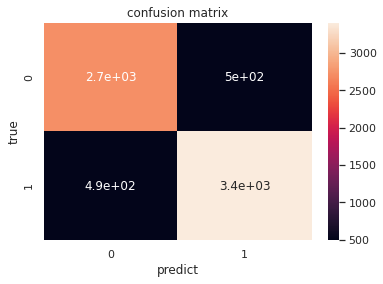

In [38]:
# labelled data_classification
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

# KNN result
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

y_predict_knn = knn_clf.predict(X_test)

from sklearn.metrics import precision_score, recall_score, f1_score

print(precision_score(y_test, y_predict_knn))
print(recall_score(y_test, y_predict_knn))
print(f1_score(y_test, y_predict_knn))

draw_cm(y_test, y_predict_knn)

0.954954954954955
0.9527478171545968
0.9538501092685435
[[2721  500]
 [ 493 3401]]


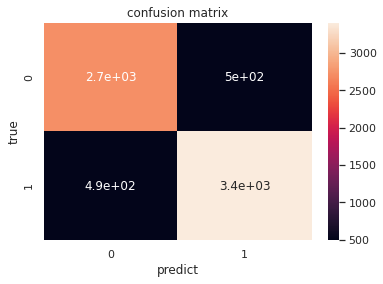

In [42]:
# Tree
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
y_predict_dt = dt_clf.predict(X_test)

print(precision_score(y_test, y_predict_dt))
print(recall_score(y_test, y_predict_dt))
print(f1_score(y_test, y_predict_dt))

draw_cm(y_test, y_predict_knn)

In [ ]:
# SVM
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train)
y_predict_svm = svm_clf.predict(X_test)

print(precision_score(y_test, y_predict_svm))
print(recall_score(y_test, y_predict_svm))
print(f1_score(y_test, y_predict_svm))

draw_cm(y_test, y_predict_svm)